In [2]:
# Load preprocessed data from Task 1
import numpy as np

X_train = np.load("../data/model_data/X_train_sm.npy")
y_train = np.load("../data/model_data/y_train_sm.npy")
X_test = np.load("../data/model_data/X_test.npy")
y_test = np.load("../data/model_data/y_test.npy")


In [4]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

In [6]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

====== Logistic Regression ======
F1 Score: 0.2749435665914221
AUC-PR: 0.4319041433305735

Confusion Matrix:


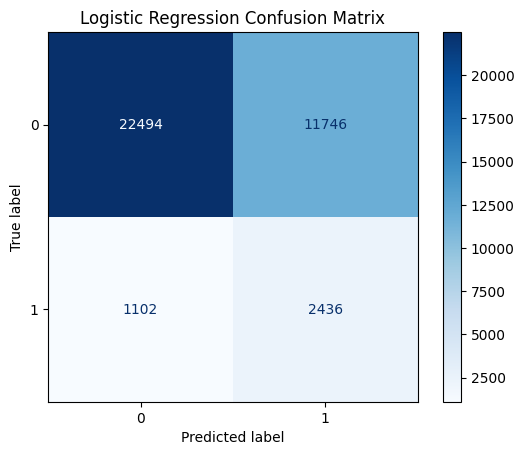

====== Random Forest ======
F1 Score: 0.47611241217798594
AUC-PR: 0.62207952411091

Confusion Matrix:


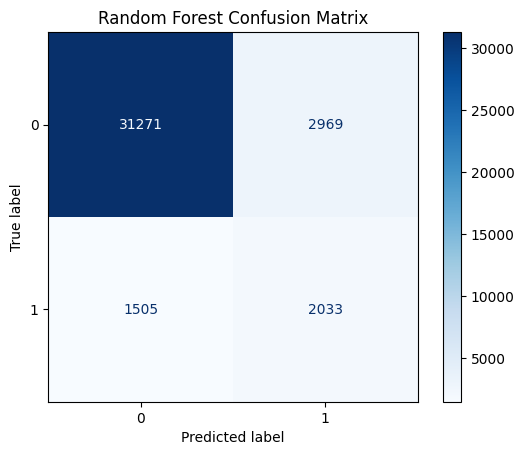

In [8]:
# Evaluate models
from sklearn.metrics import f1_score, average_precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"====== {name} ======")
    print("F1 Score:", f1_score(y_true, y_pred))
    print("AUC-PR:", average_precision_score(y_true, y_prob))
    print("\nConfusion Matrix:")
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

evaluate_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

In [9]:
# Save best model
import joblib
joblib.dump(rf_model, "../models/rf_model.pkl")

['../models/rf_model.pkl']